# Single Neuron (Perceptron)

In [1]:
from tkinter import*
import numpy as np
import random
import time

class Neuron:
    def __init__(self):
        self.weights = [0,0]
        for i in range(len(self.weights)):
            self.weights[i] =  np.random.uniform(0,1)

    def estimate(self,inputs):
        sum = 0
        for i in range(len(self.weights)):
            sum = sum + inputs[i]*self.weights[i]
        output = np.sign(sum)  ## f(x,y) = sign(x1*w1 + y1*w2) = -1 or +1
        return output

    def train(self, inputs, target):
        est = self.estimate(inputs)
        error = target - est
        for i in range(len(self.weights)):
            self.weights[i] += error*inputs[i]*0.1
    
    def estimate_y(self,x): # estimate line with current weights
        return -(self.weights[0] / self.weights[1])*x

In [2]:
class Point:
    def __init__(self):
        self.x = np.random.uniform(0,700)
        self.y = np.random.uniform(0,700)
        self.label = 0
        if self.x >= self.y:
            self.label = 1
        else:
            self.label = -1

In [3]:
# setup
def callback(event):
    print("Mouse Clicked!")
    for pt in points:
        inputs = [pt.x, pt.y]
        Nr.train(inputs, pt.label)
        est = Nr.estimate(inputs)
        if est == pt.label:
            canvas.create_oval(pt.x+3, pt.y+3,pt.x+9, pt.y+9, fill="green")
        else:
            canvas.create_oval(pt.x+3, pt.y+3, pt.x+9, pt.y+9, fill="red")
        # canvas.after(5)
        canvas.update()

        canvas.delete("line")
        canvas.create_line(10, Nr.estimate_y(10), 700, Nr.estimate_y(700), width=3,tags="line")
    #print("Finished updation!")
    print("Weights updated : ", Nr.weights)


# points = []
# for i in range(100):
#     points.append(Point())
# np.save('points_1', points)

## load data points from the file
points = np.load('points_1.npy', allow_pickle=True)
Nr = Neuron()
print("Initial Weights: ", Nr.weights)
window = Tk()
window.title("Forays Workshop")
canvas = Canvas(window, width=700, height=700, bg="white")
canvas.pack()
frame = Frame(window)
frame.pack()
# canvas.create_line(0,0,700,700, tags="line")

for pt in points:
    if pt.label == -1:
        canvas.create_oval(pt.x, pt.y,pt.x+12, pt.y+12, fill="skyblue")
    else:
        canvas.create_oval(pt.x, pt.y,pt.x+12, pt.y+12, fill="orange")
    #canvas.after(10)
    canvas.update()
# for i in range(20):
#     for pt in points:
#         inputs = [pt.x, pt.y]
#         Nr.train(inputs, pt.label)
#         est = Nr.estimate(inputs)
#         if est == pt.label:
#             canvas.create_oval(pt.x+3, pt.y+3,pt.x+9, pt.y+9, fill="green")
#         else:
#             canvas.create_oval(pt.x+3, pt.y+3, pt.x+9, pt.y+9, fill="red")
#         # canvas.after(5)
#         canvas.update()

#         canvas.delete("line")
#         canvas.create_line(10, Nr.estimate_y(10), 700, Nr.estimate_y(700), width=3,tags="line")
#         #print("Finished updation!")
#     print("Pass-",i,": Weights updated : ", Nr.weights)

canvas.bind("<Button-1>", callback)
window.mainloop()


Initial Weights:  [0.8530802459316211, 0.4423223204765758]


## Single Neuron Perceptron with bias

In [4]:
from tkinter import*
import numpy as np
import random
import time

class Neuron:
    def __init__(self):
        self.weights = [0,0,0]
        for i in range(len(self.weights)):
            self.weights[i] =  np.random.uniform(-1,1)

    def estimate(self,inputs):
        sum = 0
        for i in range(len(self.weights)):
            sum = sum + inputs[i]*self.weights[i]
        output = np.sign(sum)  ## f(x,y) = sign(x1*w1 + y1*w2) = -1 or +1
        return output

    def train(self, inputs, target):
        est = self.estimate(inputs)
        error = target - est
        for i in range(len(self.weights)):
            self.weights[i] += error*inputs[i]*0.01
    
    def estimate_y(self,x): # estimate line with current weights
        return -(self.weights[0] / self.weights[1])*x - (self.weights[2] / self.weights[1])

In [5]:
class Point:
    def __init__(self, *arg):
        if len(arg) == 0:
            self.x = np.random.uniform(-1,1) #np.random.uniform(0,700)
            self.y = np.random.uniform(-1,1) #np.random.uniform(0,700)
            self.label = 0
            lineY = f(self.x)
            if self.y > lineY:
                self.label = 1
            else:
                self.label = -1
        elif len(arg) == 2:
            self.x = arg[0]
            self.y = arg[1]
            self.label = 0
            if self.x >= self.y:
                self.label = 1
            else:
                self.label = -1
    def pixelX(self):
        return np.interp(self.x, [-1,1], [0, 700])

    def pixelY(self):
        return np.interp(self.y, [-1,1], [700, 0])
    

In [6]:
def f(x):
    return 0.3*x - 0.2

points = []
for i in range(500):
    points.append(Point())

n1 = Neuron()
print("Initial Weights: ", n1.weights)
window = Tk()
window.title("Forays Workshop")
canvas = Canvas(window, width=700, height=700, bg="white")
canvas.pack()
frame = Frame(window)
frame.pack()

p1 = Point(-1, f(-1))
p2 = Point(1,f(1))
# canvas.create_line(p1.pixelX(), p1.pixelY(), p2.pixelX(), p2.pixelY(), tags="line1")

for pt in points:
    px = pt.pixelX()
    py = pt.pixelY()
    if pt.label == -1:
        canvas.create_oval(px, py, px+12, py+12, fill="skyblue")
    else:
        canvas.create_oval(px, py, px+12, py+12, fill="orange")
    #canvas.after(10)
    canvas.update()
prev_w1 = 0
prev_w2 = 0   
count = 1 
while(prev_w1 != n1.weights[0] and prev_w2 != n1.weights[1]):
#for i in range(20):
    prev_w1 = n1.weights[0]
    prev_w2 = n1.weights[1]
    for pt in points:
        inputs = [pt.x, pt.y, 1] # 1 is for bias
        n1.train(inputs, pt.label)
        est = n1.estimate(inputs)
        px = pt.pixelX()
        py = pt.pixelY()
        if est == pt.label:
            canvas.create_oval(px+3, py+3,px+9, py+9, fill="green")
        else:
            canvas.create_oval(px+3, py+3, px+9, py+9, fill="red")
        canvas.after(5)
        canvas.update()
        canvas.delete("line")
        p3 = Point(-1, n1.estimate_y(-1))
        p4 = Point(1, n1.estimate_y(1))
        canvas.create_line(p3.pixelX(), p3.pixelY(), p4.pixelX(), p4.pixelY(), width=3, tags="line", fill="#9d44a3")
    print("Pass-",count,": Weights updated : ", n1.weights)
    count += 1
# p3 = Point(-1, n1.estimate_y(-1))
# p4 = Point(1, n1.estimate_y(1))
# canvas.create_line(p3.pixelX(), p3.pixelY(), p4.pixelX(), p4.pixelY(), width=3, tags="line", fill="#9d44a3")
print("Finished!")
window.mainloop()

Initial Weights:  [0.6547896694995925, 0.13149845011289862, 0.3774656137055403]


TclError: invalid command name ".!canvas"

# ANN (with one hidden layer)

In [1]:
import numpy as np
import scipy.special

class neuralNetwork:
    def __init__(self, inputs, hiddens, outputs, learningRate = 0.1):
        ## set number of nodes in input, hidden, output layers
        self.inputNodes = inputs
        self.hiddenNodes = hiddens
        self.outputNodes = outputs

        ## set learning rate
        self.learningRate = learningRate

        ## set Weight matrices for input to hidden and hidden to output layer
        self.weights_ih = 2*np.random.rand(self.hiddenNodes, self.inputNodes) - 1
        self.weights_ho = 2*np.random.rand(self.outputNodes, self.hiddenNodes) - 1

        ## set weights for bias
        self.bias_h = 2*np.random.rand(self.hiddenNodes, 1) - 1
        self.bias_o = 2*np.random.rand(self.outputNodes, 1) - 1

        ## set default activation function and its derivative
        self.activation_function = self.sigmoid 
        self.d_activation_function = self.dsigmoid

    def sigmoid(self, x):
        self.d_activation_function = self.dsigmoid
        return scipy.special.expit(x)
    
    def dsigmoid(self, x):
        return x*(1-x)

    # def ReLU(self,x):
    #     self.d_activation_function = self.d_ReLU
    #     return np.maximum(0,x)

    # def d_ReLU(self, x):
    #     return x > 0

    # def sign(self, x):
    #     self.d_activation_function = self.d_sign
    #     return np.sign(x)

    # def d_sign(self,x):
    #     return 1

    def feedforward(self, input_list, activation_function=None):
        if activation_function is None:
            self.activation_function = self.sigmoid
        else:
            self.activation_function = activation_function
            
        ## convert input_list to 2D array
        inputs = np.array(input_list, ndmin=2).T

        ## find inputs into hidden layer
        hidden_inputs = np.matmul(self.weights_ih, inputs) + self.bias_h

        ## find outputs from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        ## find inputs into final output layer
        final_inputs = np.matmul(self.weights_ho, hidden_outputs) + self.bias_o

        ## find outputs from the final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs
    
    def train(self, input_list, target_list, activation_function=None):
        if activation_function is None:
            self.activation_function = self.sigmoid
        else:
            self.activation_function = activation_function
            
        ## convert input_list to 2D array
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T

        ## find inputs into hidden layer
        hidden_inputs = np.matmul(self.weights_ih, inputs) + self.bias_h

        ## find outputs from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        ## find inputs into final output layer
        final_inputs = np.matmul(self.weights_ho, hidden_outputs) + self.bias_o

        ## find outputs from the final output layer
        final_outputs = self.activation_function(final_inputs)

        ## find output errors and hidden errors 
        output_errors = targets - final_outputs
        hidden_errors = np.matmul(self.weights_ho.T, output_errors)

        ## find gradient
        gradients = self.d_activation_function(final_outputs)
        hidden_gradients = self.d_activation_function(hidden_outputs)
        
        ## update weights on links
        self.weights_ho += np.matmul(self.learningRate*output_errors*gradients, hidden_outputs.T)
        self.weights_ih += np.matmul(self.learningRate*hidden_errors*hidden_gradients, inputs.T)

        ## update bias
        self.bias_o += self.learningRate*output_errors*gradients
        self.bias_h += self.learningRate*hidden_errors*hidden_gradients


## Digit Recognition

In [3]:
import pickle
mynetwork = pickle.load(open("network_with_digit_recognition_trained_weights.pickle", "rb"))

In [7]:
import numpy as np
######## test the neural network  #####

## load the mnist test data CSV file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')

    # correct answer is first value
    correct_label = int(all_values[0])

    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # query the network
    outputs = mynetwork.feedforward(inputs)

    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    
    # print("correct: ", correct_label, "pred : ", label)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    pass
 
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9676


## Predict images of own choice

28
(28, 28)
[[1.43374303e-03]
 [1.42382547e-02]
 [6.18242853e-05]
 [9.79475290e-04]
 [1.88832693e-03]
 [9.87003241e-01]
 [2.27764827e-03]
 [7.69637416e-03]
 [3.40447296e-04]
 [1.33555271e-02]]
Network answer:  5


C:\Users\Satya\AppData\Local\Temp\ipykernel_14292\3233554918.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(image_file, as_gray=True)


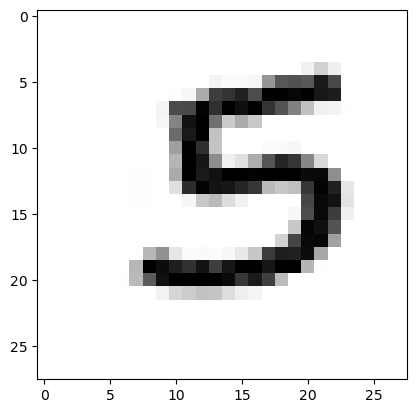

In [8]:
import matplotlib.pyplot as plt
import imageio
%matplotlib inline
image_file = 'image_2.png'
image_array = imageio.imread(image_file, as_gray=True)
# print(image_array)
print(len(image_array))
print(image_array.shape)
image_data = 255.0 - image_array.reshape(784)
image_data = (image_data/255.0)*0.99 + 0.01

# test the image data
outputs = mynetwork.feedforward(image_data)
print(outputs)
print("Network answer: ",outputs.argmax())
plt.imshow( image_data.reshape((28,28)) , cmap='Greys', interpolation='None')

# Function approximations

## ANN for function approximation

No activation function applied on output layer

In [26]:
import numpy as np
import scipy.special

class neuralNetwork:
    def __init__(self, inputs, hiddens, outputs, learningRate = 0.1):
        ## set number of nodes in input, hidden, output layers
        self.inputNodes = inputs
        self.hiddenNodes = hiddens
        self.outputNodes = outputs

        ## set learning rate
        self.learningRate = learningRate

        ## set Weight matrices for input to hidden and hidden to output layer
        self.weights_ih = 2*np.random.rand(self.hiddenNodes, self.inputNodes) - 1
        self.weights_ho = 2*np.random.rand(self.outputNodes, self.hiddenNodes) - 1

        ## set weights for bias
        self.bias_h = 2*np.random.rand(self.hiddenNodes, 1) - 1

        ## set default activation function and its derivative
        self.activation_function = self.sigmoid 
        self.d_activation_function = self.dsigmoid

        ## keep output errors
        self.output_errors = 0

    def sigmoid(self, x):
        self.d_activation_function = self.dsigmoid
        return scipy.special.expit(x)
    
    def dsigmoid(self, x):
        return x*(1-x)

    def ReLU(self,x):
        self.d_activation_function = self.d_ReLU
        return np.maximum(0,x)

    def d_ReLU(self, x):
        return x > 0

    def sign(self, x):
        self.d_activation_function = self.d_sign
        return np.sign(x)

    def d_sign(self,x):
        return 1

    def feedforward(self, input_list, activation_function=None):
        if activation_function is None:
            self.activation_function = self.sigmoid
        else:
            self.activation_function = activation_function
            
        ## convert input_list to 2D array
        inputs = np.array(input_list, ndmin=2).T

        ## find inputs into hidden layer
        hidden_inputs = np.matmul(self.weights_ih, inputs) + self.bias_h

        ## find outputs from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        ## find outputs from the final output layer
        final_outputs = np.matmul(self.weights_ho, hidden_outputs)

        return final_outputs
    
    def train(self, input_list, target_list, activation_function=None):
        if activation_function is None:
            self.activation_function = self.sigmoid
        else:
            self.activation_function = activation_function
            
        ## convert input_list to 2D array
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T

        ## find inputs into hidden layer
        hidden_inputs = np.matmul(self.weights_ih, inputs) + self.bias_h

        ## find outputs from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        ## find outputs from the final output layer
        final_outputs = np.matmul(self.weights_ho, hidden_outputs)

        ## find output errors and hidden errors 
        self.output_errors = targets - final_outputs
        hidden_errors = np.matmul(self.weights_ho.T, self.output_errors)

        ## find gradient
        gradients = self.d_activation_function(final_outputs)
        hidden_gradients = self.d_activation_function(hidden_outputs)
        
        ## update weights on links
        self.weights_ho += np.matmul(self.learningRate*self.output_errors*gradients, hidden_outputs.T)
        self.weights_ih += np.matmul(self.learningRate*hidden_errors*hidden_gradients, inputs.T)

        ## update bias
        self.bias_h += self.learningRate*hidden_errors*hidden_gradients


## Test Case-1:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## number of input, hidden and output nodes
input_nodes = 1
hidden_nodes = 100
output_nodes = 1
learning_rate = 0.0001

## create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

data = np.linspace(-2, 2, 21)
target = data**2
epochs = 30000
for e in range(epochs):
    for i in range(len(data)):
        n.train(data[i], target[i], n.ReLU)
        
print(n.output_errors)
print(n.feedforward([1], n.ReLU))

[[0.09396862]]
[[0.9934691]]


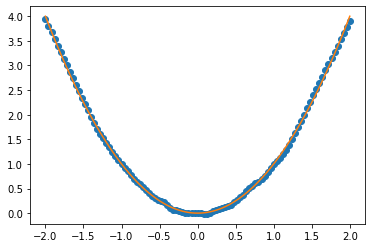

error in results :  0.3457514453504667


In [28]:
test_data = np.linspace(-2, 2, 101)
correct_answers = test_data**2
results = []
for t in test_data:
    results.append(n.feedforward(t, n.ReLU)[0][0])

plt.plot(test_data, results, 'o')
plt.plot(test_data, correct_answers)
plt.show()
print("error in results : ", np.linalg.norm(results-correct_answers,2))

## Test Case - 2

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## number of input, hidden and output nodes
input_nodes = 1
hidden_nodes = 100
output_nodes = 1
learning_rate = 0.001

## create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

data = np.linspace(-2, 2, 301)
x = data
target = (x+1)**2*(x-1)
epochs = 5000
for e in range(epochs):
    for i in range(len(data)):
        n.train(data[i], target[i], n.ReLU)
        
print(n.output_errors)
print(n.feedforward([1], n.ReLU))

[[0.06860923]]
[[0.03177106]]


In [ ]:
test_data = np.linspace(-2, 2, 51)
x = test_data
correct_answers = (x+1)**2*(x-1)
results = []
for t in test_data:
    results.append(n.feedforward(t, n.ReLU)[0][0])

plt.plot(test_data, results, 'o')
plt.plot(test_data, correct_answers)
plt.show()
print("error in results : ", np.linalg.norm(results-correct_answers,2))